In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Current work
print(os.getcwd())
# Change directory 2 level up
os.chdir("..")
os.chdir("..")
print(os.getcwd())
# Look for the file in the directory
print(os.listdir())

/tmp/ipykernel_528501/955764169.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


/home/jose/Git/SE-AP/experiments/experiment_2
/home/jose/Git/SE-AP
['models', '.pre-commit-config.yaml', 'aaa.png', 'demos', '.gitignore', 'experiments', 'include', '.git', '.env', 'README.md', 'output.png', '.env-example', 'LICENSE']


In [2]:
model = "gpt-3.5-turbo"
prompt_technique = "chain"
temperature = 0.7
embedding_size = 200

In [3]:
data = pd.read_csv(f'experiments/experiment_2/results_with_distances/{model}/results_with_distances_{prompt_technique}_{model}_{temperature}_{embedding_size}.csv')
data[data['Iteration'] == 1]

,Induced Pathology,Category,Surveyed Word,Related 1,Related 2,Related 3,Related 4,Related 5,Related 6,Related 7,...,Sequential Distance 3,Sequential Distance 4,Sequential Distance 5,Sequential Distance 6,Sequential Distance 7,Sequential Distance 8,Sequential Distance 9,Sequential Distance 10,Average Sequential Distance,STD Sequential Distance
0,No Pathology,MWB-C,house,cozy,inviting,spacious,organized,clean,comfortable,welcoming,...,0.657916,0.743089,0.684670,0.661000,0.772007,0.826140,1.101786,0.923429,0.780378,0.139528
1,No Pathology,MWB-C,car,reliable,efficient,sleek,stylish,well-maintained,comfortable,modern,...,0.713055,0.751922,1.077707,0.693521,0.726083,0.703648,0.807126,0.678800,0.753240,0.122741
2,No Pathology,MWB-C,coat,warm,fashionable,stylish,comfortable,well-fitted,versatile,durable,...,0.689897,0.795517,1.000000,0.988074,0.936589,0.847042,0.877733,0.677670,0.819019,0.131313
3,No Pathology,MWB-C,necklace,beautiful,elegant,delicate,eye-catching,stylish,meaningful,timeless,...,0.735499,0.827741,0.803780,1.083618,0.867469,0.706957,0.969976,0.786729,0.818945,0.126029
4,No Pathology,MWB-C,sofa,comfortable,plush,spacious,stylish,supportive,cozy,inviting,...,0.670666,0.755444,0.914930,0.557317,0.896793,0.834038,1.000000,0.650106,0.738861,0.166840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Social Anxiety,I-A,insecurity,self-doubt,uncertainty,fear,vulnerability,anxiety,instability,doubt,...,0.426843,0.468530,0.432918,0.291198,0.695774,0.559420,1.000000,0.483212,0.547182,0.195626
1596,Social Anxiety,I-A,indifference,apathy,unconcern,disinterest,detachment,passivity,disregard,nonchalance,...,0.339988,0.792203,0.337178,0.360758,0.510288,0.573343,0.420352,0.699899,0.506179,0.170958
1597,Social Anxiety,I-A,infidelity,betrayal,unfaithfulness,adultery,disloyalty,treachery,cheating,deceit,...,0.352199,0.634998,0.505702,0.500962,0.569337,0.621075,0.846992,0.655133,0.558616,0.139761
1598,Social Anxiety,I-A,aggressiveness,hostility,belligerence,aggression,combativeness,confrontational,antagonism,violence,...,0.589447,0.447780,0.680291,0.611218,0.845795,0.406073,0.562663,0.436732,0.580048,0.130037


In [4]:
import pandas as pd

# Cargamos el dataset
file_path = 'experiments/experiment_2/results_with_distances/gpt-3.5-turbo/results_with_distances_chain_gpt-3.5-turbo_0.7_200.csv'
data = pd.read_csv(file_path)

# Aseguramos que solo seleccionamos columnas numéricas para el agrupamiento y calculo de la media
distances_columns = [col for col in data.columns if 'Sequential Distance' in col]

# Solo trabajamos con las columnas numéricas relevantes
numeric_data = data[['Induced Pathology', 'Surveyed Word'] + distances_columns]

# Agrupamos por 'Induced Pathology' y 'Surveyed Word', calculando la media solo de las columnas numéricas
grouped_data = numeric_data.groupby(['Induced Pathology', 'Surveyed Word']).mean().reset_index()
grouped_data


,Induced Pathology,Surveyed Word,Sequential Distance 1,Sequential Distance 2,Sequential Distance 3,Sequential Distance 4,Sequential Distance 5,Sequential Distance 6,Sequential Distance 7,Sequential Distance 8,Sequential Distance 9,Sequential Distance 10,Average Sequential Distance,STD Sequential Distance
0,Alcohol Addiction,achievement,0.714272,0.682181,0.786141,0.821250,0.814466,0.801718,0.772313,0.794044,0.762191,0.784788,0.773337,0.105801
1,Alcohol Addiction,admiration,0.603103,0.629228,0.634529,0.644098,0.637041,0.700485,0.715402,0.677657,0.730494,0.719305,0.669134,0.154854
2,Alcohol Addiction,agenda,0.778143,0.792369,0.868596,0.888051,0.875020,0.841506,0.831277,0.841938,0.843808,0.851288,0.841200,0.083956
3,Alcohol Addiction,aggressiveness,0.606491,0.611130,0.625376,0.682488,0.566528,0.597176,0.609606,0.592614,0.604861,0.620548,0.611682,0.129119
4,Alcohol Addiction,aid,0.594234,0.537324,0.614991,0.671454,0.640781,0.681926,0.735909,0.726393,0.743598,0.741634,0.668824,0.197773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,Trait Anxiety,watch,0.558359,0.727758,0.740310,0.820322,0.795307,0.793403,0.808787,0.810736,0.811879,0.824297,0.769116,0.141331
1596,Trait Anxiety,water,0.722333,0.716492,0.653184,0.658561,0.638592,0.610071,0.583415,0.619485,0.644976,0.665419,0.651253,0.146879
1597,Trait Anxiety,weakness,0.541684,0.557314,0.558525,0.597202,0.609454,0.599858,0.632657,0.674595,0.658652,0.663405,0.609334,0.116851
1598,Trait Anxiety,wealth,0.891133,0.743009,0.641655,0.617666,0.610071,0.612952,0.575830,0.569758,0.585118,0.597645,0.644484,0.159942


In [5]:
from sklearn.decomposition import PCA
import numpy as np

# Inicializamos una lista para guardar los resultados de PCA por cada patología inducida
pca_results = []

# Obtenemos las patologías inducidas únicas
induced_pathologies = grouped_data['Induced Pathology'].unique()

# Iteramos sobre cada patología inducida para aplicar PCA a sus correspondientes datos
for pathology in induced_pathologies:
    # Filtramos los datos para la patología inducida actual
    pathology_data = grouped_data[grouped_data['Induced Pathology'] == pathology]
    
    # Seleccionamos solo las columnas de distancias secuenciales para PCA
    sequential_distances_data = pathology_data.filter(like='Sequential Distance').values
    
    # Aplicamos PCA para reducir a 2 componentes principales
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(sequential_distances_data)
    
    # Creamos un DataFrame con los componentes principales y la información relevante
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
    pca_df['Induced Pathology'] = pathology
    pca_df['Surveyed Word'] = pathology_data['Surveyed Word'].values
    print(pca_df)
    
    # Agregamos los resultados a la lista de resultados de PCA
    pca_results.append(pca_df)

# Concatenamos todos los DataFrames de resultados en uno solo
final_pca_results = pd.concat(pca_results).reset_index(drop=True)

final_pca_results

          PC1       PC2  Induced Pathology   Surveyed Word
0   -0.140805  0.021289  Alcohol Addiction     achievement
1    0.210873  0.019561  Alcohol Addiction      admiration
2   -0.366038 -0.006865  Alcohol Addiction          agenda
3    0.395441 -0.096121  Alcohol Addiction  aggressiveness
4    0.214842  0.096876  Alcohol Addiction             aid
..        ...       ...                ...             ...
155 -0.353937  0.080422  Alcohol Addiction           watch
156  0.441181 -0.285872  Alcohol Addiction           water
157  0.079360  0.106391  Alcohol Addiction        weakness
158  0.645032 -0.156083  Alcohol Addiction          wealth
159 -0.027139 -0.000896  Alcohol Addiction           yacht

[160 rows x 4 columns]
          PC1       PC2 Induced Pathology   Surveyed Word
0   -0.192561 -0.022439            Apathy     achievement
1    0.451986  0.035167            Apathy      admiration
2   -0.120601 -0.000021            Apathy          agenda
3    0.828036 -0.125703            A

,PC1,PC2,Induced Pathology,Surveyed Word
0,-0.140805,0.021289,Alcohol Addiction,achievement
1,0.210873,0.019561,Alcohol Addiction,admiration
2,-0.366038,-0.006865,Alcohol Addiction,agenda
3,0.395441,-0.096121,Alcohol Addiction,aggressiveness
4,0.214842,0.096876,Alcohol Addiction,aid
...,...,...,...,...
1595,0.100950,-0.162960,Trait Anxiety,watch
1596,-0.267242,0.201075,Trait Anxiety,water
1597,-0.421085,0.004418,Trait Anxiety,weakness
1598,-0.277376,0.388562,Trait Anxiety,wealth


In [6]:
specific_words = ['calendar', 'fat', 'frustration']


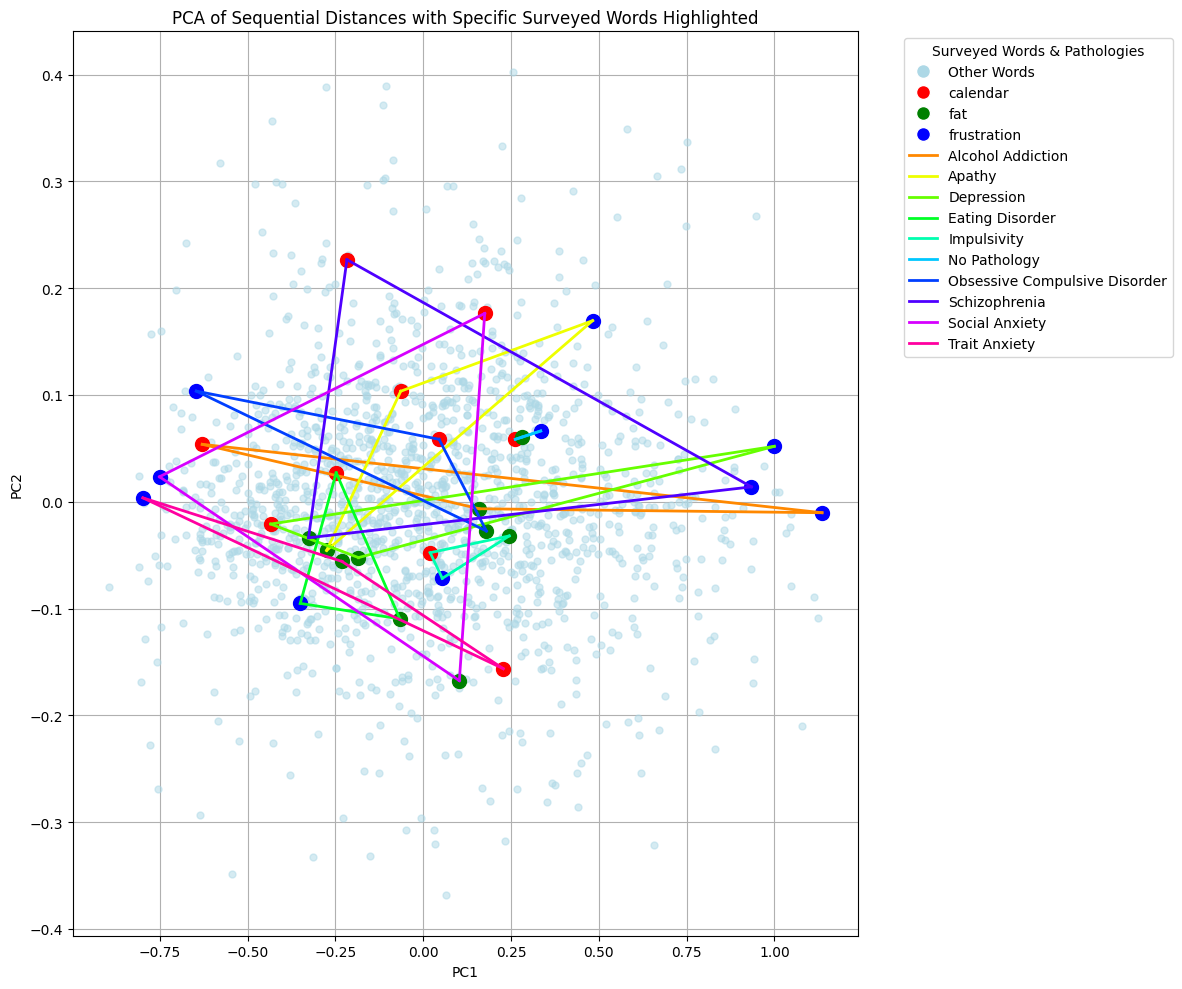

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

filtered_df = final_pca_results[final_pca_results['Surveyed Word'].isin(specific_words)]

# Establecemos colores para las palabras específicas y los puntos no seleccionados
colors = {f'{specific_words[0]}': 'red', f'{specific_words[1]}': 'green', f'{specific_words[2]}': 'blue'}
default_color = 'lightblue'

# Inicializamos la figura
plt.figure(figsize=(12, 10))

# Dibujamos primero todos los puntos con color por defecto para los no seleccionados
for _, row in final_pca_results.iterrows():
    plt.plot(row['PC1'], row['PC2'], marker='o', color=default_color, markersize=5, alpha=0.5)

# Dibujamos y etiquetamos los puntos específicos con sus respectivos colores
for _, row in filtered_df.iterrows():
    plt.plot(row['PC1'], row['PC2'], marker='o', color=colors[row['Surveyed Word']], markersize=10)

# Interconectamos los puntos específicos por patología, usando el color de la patología para las líneas
pathology_colors = sns.color_palette("hsv", len(filtered_df['Induced Pathology'].unique()))
pathology_to_color = {pathology: color for pathology, color in zip(filtered_df['Induced Pathology'].unique(), pathology_colors)}

for pathology, group_df in filtered_df.groupby('Induced Pathology'):
    pca1_values = group_df['PC1'].values
    pca2_values = group_df['PC2'].values
    for i in range(len(group_df) - 1):
        for j in range(i + 1, len(group_df)):
            plt.plot([pca1_values[i], pca1_values[j]], [pca2_values[i], pca2_values[j]], color=pathology_to_color[pathology], lw=2)

plt.title('PCA of Sequential Distances with Specific Surveyed Words Highlighted')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)

# Creamos una leyenda personalizada para los puntos y las líneas
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=default_color, markersize=10, label='Other Words'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label=f'{specific_words[0]}'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label=f'{specific_words[1]}'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label=f'{specific_words[2]}')] + \
                  [Line2D([0], [0], color=color, lw=2, label=pathology) for pathology, color in pathology_to_color.items()]

plt.legend(handles=legend_elements, title='Surveyed Words & Pathologies', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [8]:
# no pathology df
no_pathology_df = final_pca_results[final_pca_results['Induced Pathology'] == 'No Pathology']
no_pathology_df

deppression_df = final_pca_results[final_pca_results['Induced Pathology'] == 'Depression']
deppression_df

,PC1,PC2,Induced Pathology,Surveyed Word
320,-0.130481,0.011949,Depression,achievement
321,-0.157101,0.067352,Depression,admiration
322,-0.101822,0.065068,Depression,agenda
323,0.633746,-0.069144,Depression,aggressiveness
324,-0.150051,-0.146235,Depression,aid
...,...,...,...,...
475,-0.159554,0.060161,Depression,watch
476,0.127744,-0.024256,Depression,water
477,0.325922,0.089032,Depression,weakness
478,0.262594,-0.167374,Depression,wealth


In [9]:
# from scipy.spatial.distance import euclidean
# from itertools import combinations
# import math
# from tqdm import tqdm  # Importamos tqdm

# # Función para calcular el área de un triángulo dado sus lados usando la fórmula de Herón
# def triangle_area(s1, s2, s3):
#     # Semiperímetro
#     s = (s1 + s2 + s3) / 2
#     # Área
#     area = math.sqrt(s * (s - s1) * (s - s2) * (s - s3))
#     return area

# # Calculamos todas las combinaciones posibles de tres palabras
# word_combinations = list(combinations(deppression_df['Surveyed Word'], 3))

# # Lista para almacenar el área y las palabras de cada combinación
# areas_with_words = []

# # Utilizamos tqdm aquí para envolver word_combinations y mostrar la barra de progreso
# for words in tqdm(word_combinations, desc="Calculando áreas"):
#     # Extraemos los puntos de PCA para las palabras seleccionadas
#     points = [deppression_df[deppression_df['Surveyed Word'] == word][['PC1', 'PC2']].values[0] for word in words]
    
#     # Calculamos las distancias entre los puntos (lados del triángulo)
#     s1 = euclidean(points[0], points[1])
#     s2 = euclidean(points[1], points[2])
#     s3 = euclidean(points[2], points[0])
    
#     # Calculamos el área del triángulo formado por los puntos
#     area = triangle_area(s1, s2, s3)
    
#     # Agregamos el área y las palabras a la lista
#     areas_with_words.append((area, words))

# # Ordenamos la lista por el área de cada combinación (de menor a mayor)
# areas_with_words.sort(key=lambda x: x[0])

# # Seleccionamos las 10 combinaciones con las áreas más pequeñas
# top_10_areas_with_words = areas_with_words[:10]

# for i, (area, words) in enumerate(top_10_areas_with_words, start=1):
#     print(f"Top {i}: Área = {area}, Palabras = {words}")


Calculando áreas: 100%|██████████| 669920/669920 [10:59<00:00, 1016.33it/s]
Top 1: Área = 3.094007325751301e-08, Palabras = ('calendar', 'fat', 'frustration')
Top 2: Área = 4.3082545671994714e-08, Palabras = ('employee', 'purse', 'salary')
Top 3: Área = 8.604832743040325e-08, Palabras = ('butter', 'purse', 'salary')
Top 4: Área = 8.962630947506513e-08, Palabras = ('contract', 'fruits', 'hardship')
Top 5: Área = 1.4436236197614726e-07, Palabras = ('achievement', 'frown', 'painting')
Top 6: Área = 1.483502354172576e-07, Palabras = ('estrangement', 'purse', 'salary')
Top 7: Área = 3.104903496258502e-07, Palabras = ('leadership', 'longevity', 'motivation')
Top 8: Área = 4.2342975427370216e-07, Palabras = ('chat', 'failure', 'game')
Top 9: Área = 4.263068453670266e-07, Palabras = ('motivation', 'purse', 'salary')
Top 10: Área = 4.4031150595821355e-07, Palabras = ('decay', 'hygiene', 'yacht')



Calculando áreas: 100%|██████████| 669920/669920 [12:21<00:00, 903.68it/s] 
Top 1: Área = 2.7373153258063993e-09, Palabras = ('aid', 'painting', 'status')
Top 2: Área = 1.4310173418152691e-08, Palabras = ('books', 'contract', 'savings')
Top 3: Área = 1.1895552137129367e-07, Palabras = ('bickering', 'creativity', 'sofa')
Top 4: Área = 2.467231442797005e-07, Palabras = ('camera', 'chat', 'recovery')
Top 5: Área = 2.568636831365685e-07, Palabras = ('achievement', 'distance', 'love')
Top 6: Área = 4.3627762223129774e-07, Palabras = ('doctor', 'laptop', 'painting')
Top 7: Área = 4.951827026920158e-07, Palabras = ('cigarettes', 'estrangement', 'hug')
Top 8: Área = 5.367585465595944e-07, Palabras = ('diet', 'hug', 'illness')
Top 9: Área = 6.014101977302336e-07, Palabras = ('bread', 'progress', 'status')
Top 10: Área = 6.190696843359633e-07, Palabras = ('camera', 'insult', 'smile')

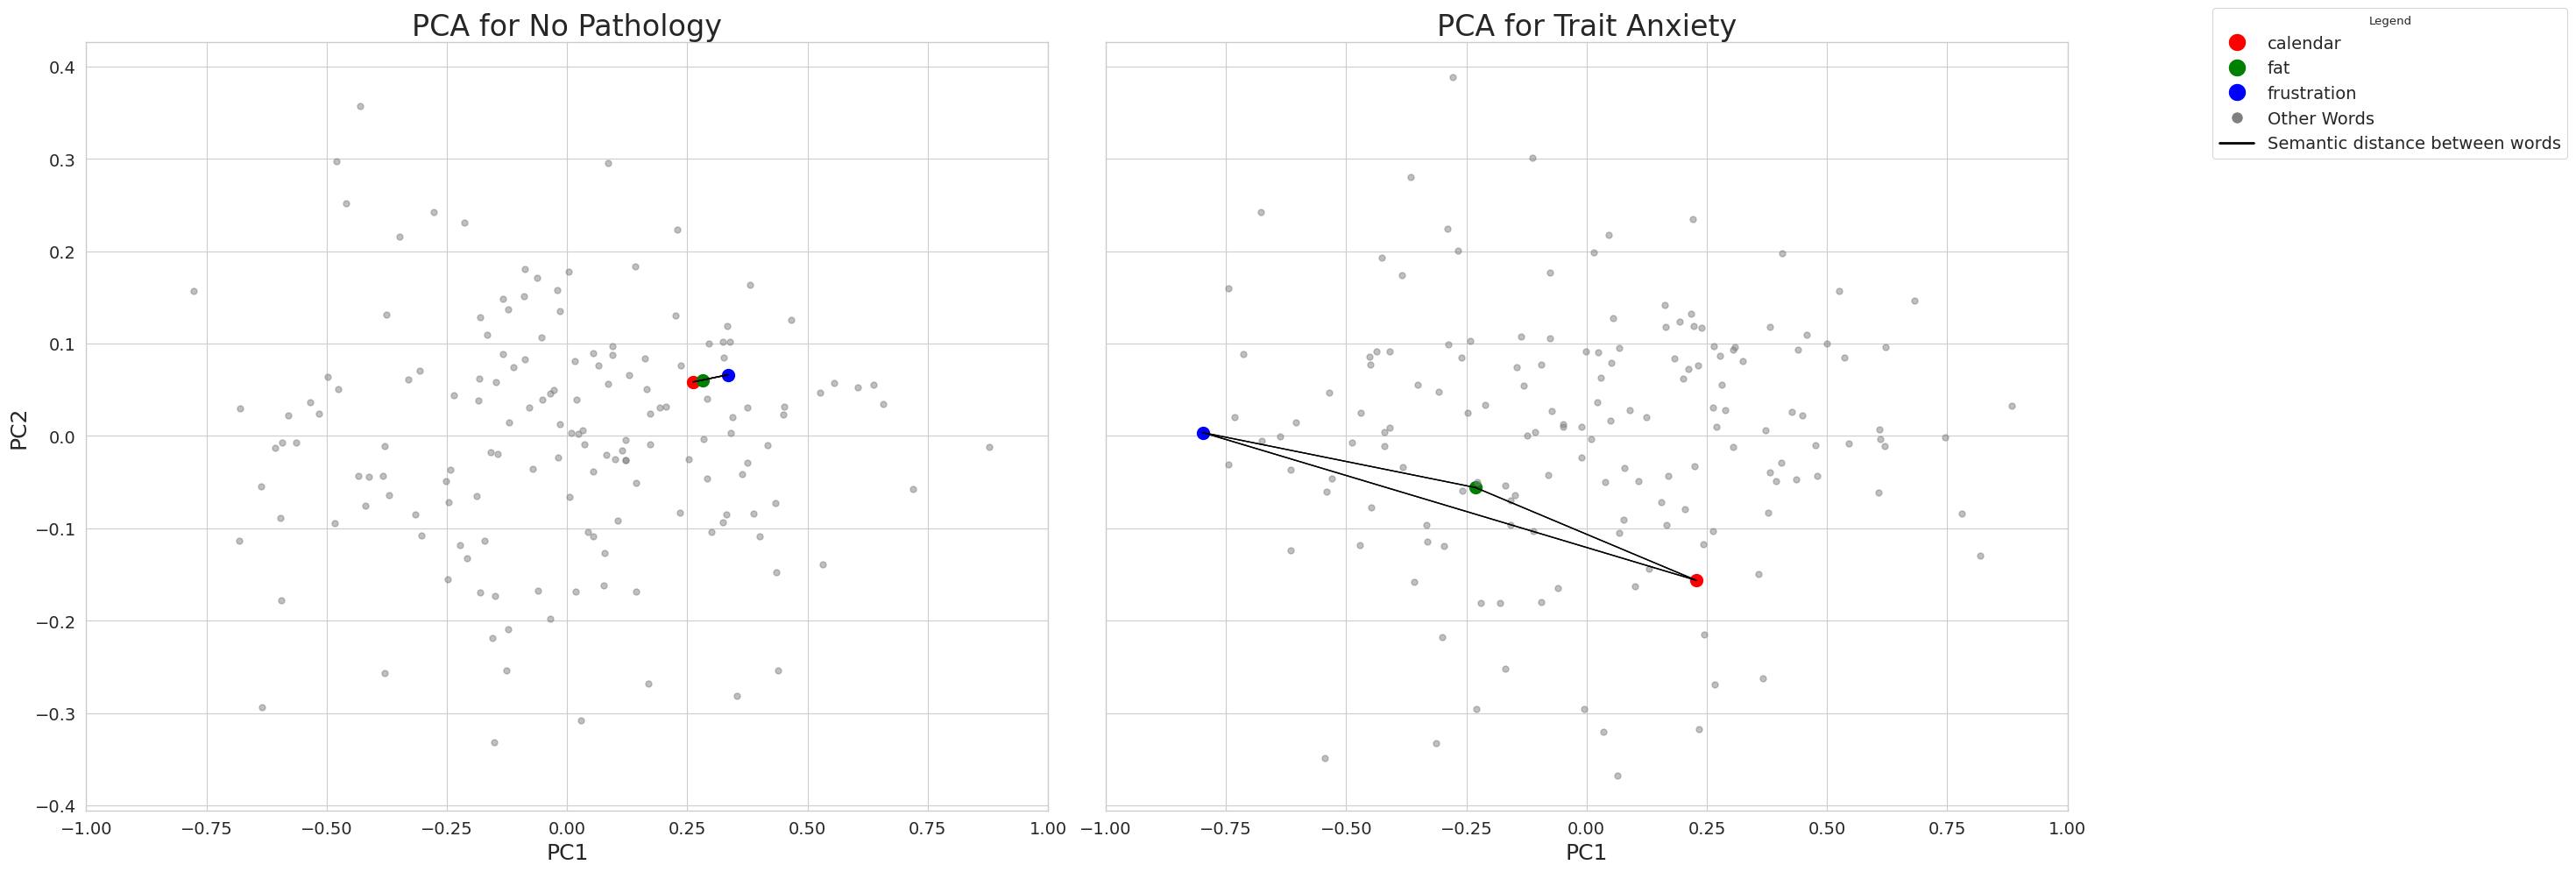

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import pandas as pd

# Configuración global de la fuente más grande para todos los textos
plt.rcParams.update({'font.size': 16})
sns.set_context("paper")  # Esto aumenta el tamaño de fuente de los elementos de acuerdo al contexto 'paper'

# Asumimos la definición de 'final_pca_results' y 'specific_words' aquí.

# Colores para las palabras específicas y un color más oscuro para 'Other Words'
colors = {f'{specific_words[0]}': 'red', f'{specific_words[1]}': 'green', f'{specific_words[2]}': 'blue'}
default_color = 'grey'  # Cambiado a un color más oscuro para 'Other Words'

sns.set_style("whitegrid")  # Estilo de fondo con rejilla para mejor legibilidad

# Inicializamos la figura con dos subgráficos (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(24, 10), sharey=True)

# Función para dibujar los puntos, las conexiones y las palabras específicas
def plot_pca(ax, df, pathology_label):
    # Dibujamos todos los puntos del dataframe específico
    for _, row in df.iterrows():
        color = colors[row['Surveyed Word']] if row['Surveyed Word'] in specific_words else default_color
        ax.plot(row['PC1'], row['PC2'], marker='o', color=color, markersize=5 if row['Surveyed Word'] not in specific_words else 10, alpha=0.5 if row['Surveyed Word'] not in specific_words else 1)

    # Conectamos las tres palabras específicas con líneas negras
    specific_points = df[df['Surveyed Word'].isin(specific_words)][['PC1', 'PC2']]
    if len(specific_points) == len(specific_words):  # Aseguramos que las tres palabras estén presentes
        for i, word1 in specific_points.iterrows():
            for j, word2 in specific_points.iterrows():
                if i != j:
                    ax.plot([word1['PC1'], word2['PC1']], [word1['PC2'], word2['PC2']], color='black', lw=1)

    # Títulos y etiquetas con tamaños de fuente más grandes
    ax.set_title(f'PCA for {pathology_label}', fontsize=24)
    ax.set_xlabel('PC1', fontsize=18)
    ax.set_xlim(-1, 1)  # Limitamos el eje X para una mejor visualización
    ax.tick_params(axis='both', which='major', labelsize=14)  # Tamaño de las marcas de los ejes

# Filtramos el dataframe para incluir solo 'No Pathology' y 'Social Anxiety'
df_no_pathology = final_pca_results[(final_pca_results['Induced Pathology'] == 'No Pathology')]
df_social_anxiety = final_pca_results[(final_pca_results['Induced Pathology'] == 'Trait Anxiety')]

# Dibujamos los puntos para cada subconjunto
plot_pca(axs[0], df_no_pathology, 'No Pathology')
plot_pca(axs[1], df_social_anxiety, 'Trait Anxiety')

# Configuramos el eje Y solo en el primer gráfico para evitar repetición
axs[0].set_ylabel('PC2', fontsize=18)  # Tamaño de fuente para la etiqueta del eje Y

# Creamos una leyenda personalizada con tamaños de fuente más grandes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=15, label=f'{specific_words[0]}'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=15, label=f'{specific_words[1]}'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=15, label=f'{specific_words[2]}'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=default_color, markersize=10, label='Other Words'),
    Line2D([0], [0], color='black', lw=2, label='Semantic distance between words')
]

# Configuramos el tamaño de fuente para la leyenda
fig.legend(handles=legend_elements, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()


In [11]:
specific_words = ['books', 'contract', 'savings']


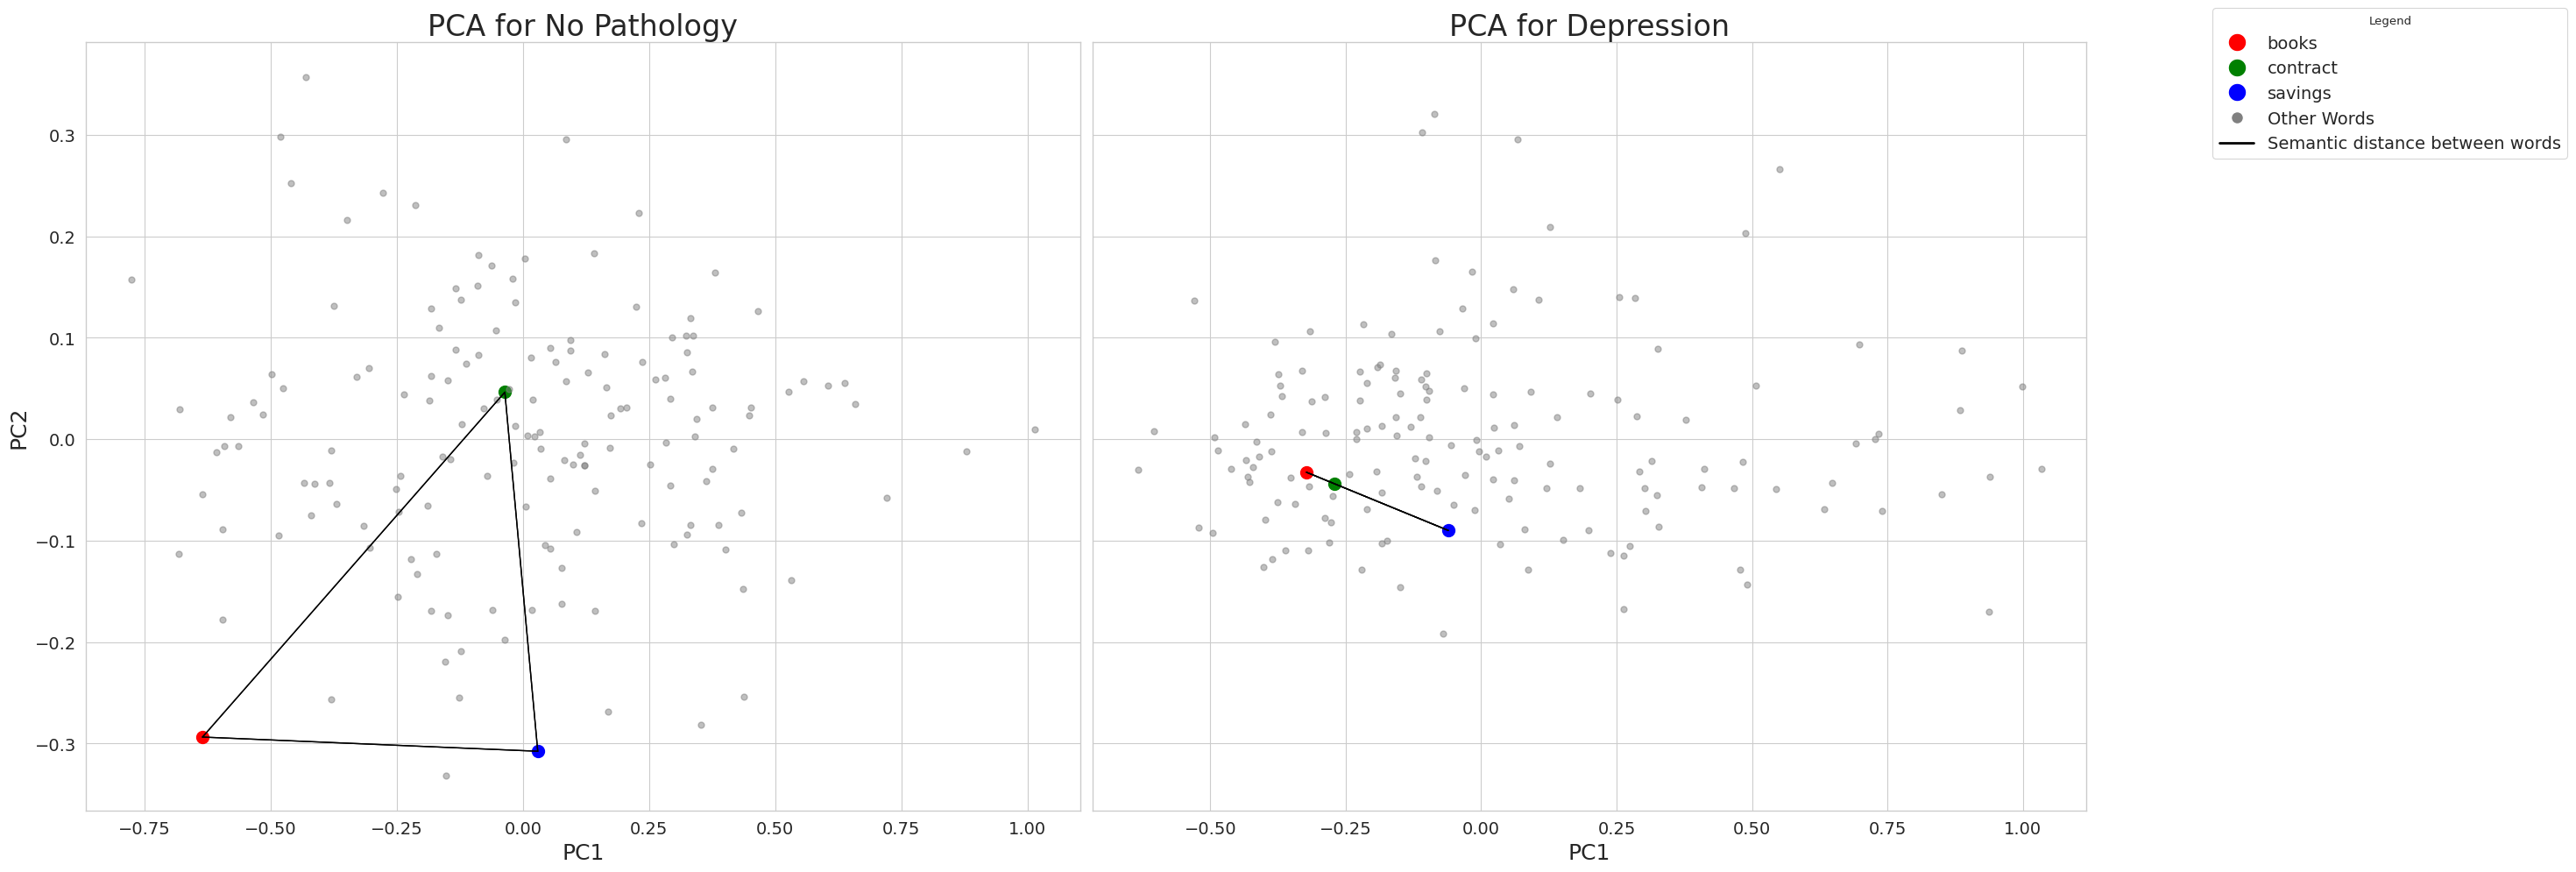

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import pandas as pd

# Configuración global de la fuente más grande para todos los textos
plt.rcParams.update({'font.size': 16})
sns.set_context("paper")  # Esto aumenta el tamaño de fuente de los elementos de acuerdo al contexto 'paper'

# Asumimos la definición de 'final_pca_results' y 'specific_words' aquí.

# Colores para las palabras específicas y un color más oscuro para 'Other Words'
colors = {f'{specific_words[0]}': 'red', f'{specific_words[1]}': 'green', f'{specific_words[2]}': 'blue'}
default_color = 'grey'  # Cambiado a un color más oscuro para 'Other Words'

sns.set_style("whitegrid")  # Estilo de fondo con rejilla para mejor legibilidad

# Inicializamos la figura con dos subgráficos (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(24, 10), sharey=True)

# Función para dibujar los puntos, las conexiones y las palabras específicas
def plot_pca(ax, df, pathology_label):
    # Dibujamos todos los puntos del dataframe específico
    for _, row in df.iterrows():
        color = colors[row['Surveyed Word']] if row['Surveyed Word'] in specific_words else default_color
        ax.plot(row['PC1'], row['PC2'], marker='o', color=color, markersize=5 if row['Surveyed Word'] not in specific_words else 10, alpha=0.5 if row['Surveyed Word'] not in specific_words else 1)

    # Conectamos las tres palabras específicas con líneas negras
    specific_points = df[df['Surveyed Word'].isin(specific_words)][['PC1', 'PC2']]
    if len(specific_points) == len(specific_words):  # Aseguramos que las tres palabras estén presentes
        for i, word1 in specific_points.iterrows():
            for j, word2 in specific_points.iterrows():
                if i != j:
                    ax.plot([word1['PC1'], word2['PC1']], [word1['PC2'], word2['PC2']], color='black', lw=1)

    # Títulos y etiquetas con tamaños de fuente más grandes
    ax.set_title(f'PCA for {pathology_label}', fontsize=24)
    ax.set_xlabel('PC1', fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=14)  # Tamaño de las marcas de los ejes

# Filtramos el dataframe para incluir solo 'No Pathology' y 'Social Anxiety'
df_no_pathology = final_pca_results[(final_pca_results['Induced Pathology'] == 'No Pathology')]
df_social_anxiety = final_pca_results[(final_pca_results['Induced Pathology'] == 'Depression')]

# Dibujamos los puntos para cada subconjunto
plot_pca(axs[0], df_no_pathology, 'No Pathology')
plot_pca(axs[1], df_social_anxiety, 'Depression')

# Configuramos el eje Y solo en el primer gráfico para evitar repetición
axs[0].set_ylabel('PC2', fontsize=18)  # Tamaño de fuente para la etiqueta del eje Y

# Creamos una leyenda personalizada con tamaños de fuente más grandes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=15, label=f'{specific_words[0]}'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=15, label=f'{specific_words[1]}'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=15, label=f'{specific_words[2]}'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=default_color, markersize=10, label='Other Words'),
    Line2D([0], [0], color='black', lw=2, label='Semantic distance between words')
]

# Configuramos el tamaño de fuente para la leyenda
fig.legend(handles=legend_elements, title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
#runear PCA 100 veces para mas confiabilidad

In [14]:
"""
cojer distancias euclideas en el plano y ver en que medida se correlacionan con las sdistanias euclideas de glove. coseno.
mi gradiente sera mayor para x ejemplo en esste caso trait aniety

distancia PCA entre 2 puntos y distancia entre 2 puntos glove, sanity check, de que esto esta capturando semantica.

patologia como regressor el gradiente de cmbio es mayor para las patologias que expanden y mas bajo para patologias que hacen contraccion.

tomar el mismo triplete para ambos graficos.
"""

''